# Предобработка данных

## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2


%matplotlib inline
plt.rcParams.update({'font.size':14})

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values,  train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values,  test_pred_values), 3)))
    
    plt.figure(figsize = (18, 10))
    
    plt.subplot(121)
    sns.scatterplot(x = train_pred_values, y = train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x = test_pred_values, y = test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

In [4]:
TRAIN_DATASET_PATH = 'C:\\Users\\Marusai\\Desktop\\Обучение искуственный интеллект\\Библиотеки Python\\train.csv'
TEST_DATASET_PATH = 'C:\\Users\\Marusai\\Desktop\\Обучение искуственный интеллект\\Библиотеки Python\\test.csv'
Pozdnyakova_predictions = 'C:\\Users\\Marusai\\Desktop\\Обучение искуственный интеллект\\Библиотеки Python\\Pozdnyakova_predictions.csv'

### Описание датасета

Id - идентификационный номер квартиры,

DistrictId - идентификационный номер района,

Rooms - количество комнат,

Square - площадь,

LifeSquare - жилая площадь,

KitchenSquare - площадь кухни,

Floor - этаж,

HouseFloor - количество этажей в доме,

HouseYear - год постройки дома,

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности,

Social_1, Social_2, Social_3 - социальные показатели местности,

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья,

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров,

Price - цена квартиры.


In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep = ',')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
train_df.shape

(10000, 20)

In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH, sep = ',')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [8]:
train_df.shape[1] -1 == test_df.shape[1]

True

In [9]:
test_df.shape

(5000, 19)

In [10]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [13]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [14]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

## Обзор данных

<function matplotlib.pyplot.show(close=None, block=None)>

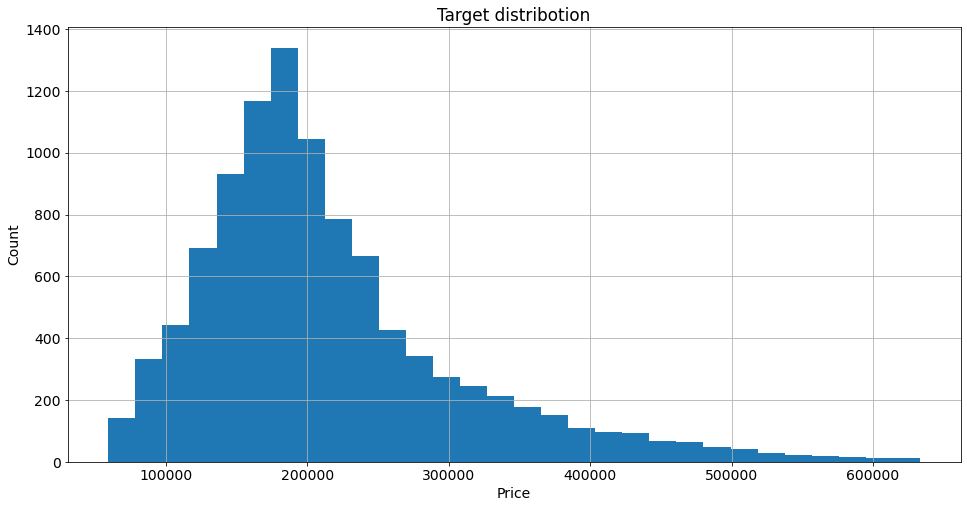

In [15]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins = 30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribotion')
plt.show

### Количественные переменные

In [16]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [17]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [18]:
train_df[train_df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [19]:
test_df[test_df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


### Номинативные переменные

In [20]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [21]:
test_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [22]:
train_df['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [23]:
test_df['DistrictId'].value_counts().head()

27    391
1     344
23    264
6     257
9     132
Name: DistrictId, dtype: int64

In [24]:
len(train_df['DistrictId'].value_counts())

205

In [25]:
len(test_df['DistrictId'].value_counts())

201

In [26]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [27]:
test_df['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [28]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [29]:
test_df['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [30]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [31]:
test_df['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

### Обработка пропусков

In [32]:
(len(train_df) - train_df.count())/len(train_df)

Id               0.0000
DistrictId       0.0000
Rooms            0.0000
Square           0.0000
LifeSquare       0.2113
KitchenSquare    0.0000
Floor            0.0000
HouseFloor       0.0000
HouseYear        0.0000
Ecology_1        0.0000
Ecology_2        0.0000
Ecology_3        0.0000
Social_1         0.0000
Social_2         0.0000
Social_3         0.0000
Healthcare_1     0.4798
Helthcare_2      0.0000
Shops_1          0.0000
Shops_2          0.0000
Price            0.0000
dtype: float64

In [33]:
(len(test_df) - test_df.count())/len(test_df)

Id               0.0000
DistrictId       0.0000
Rooms            0.0000
Square           0.0000
LifeSquare       0.2082
KitchenSquare    0.0000
Floor            0.0000
HouseFloor       0.0000
HouseYear        0.0000
Ecology_1        0.0000
Ecology_2        0.0000
Ecology_3        0.0000
Social_1         0.0000
Social_2         0.0000
Social_3         0.0000
Healthcare_1     0.4754
Helthcare_2      0.0000
Shops_1          0.0000
Shops_2          0.0000
dtype: float64

In [34]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,0.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,0.0
8,64.511437,NaN,1.0
9,46.461409,18.915552,8.0


In [35]:
test_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,49.882643,33.432782,6.0
1,69.263183,NaN,1.0
2,13.597819,15.948246,12.0
3,73.046609,51.940842,9.0
4,47.527111,43.387569,1.0
5,40.675627,NaN,1.0
6,68.099538,64.843025,1.0
7,48.193897,32.857644,6.0
8,72.277106,45.968758,9.0
9,80.219400,47.660260,9.0


#### LifeSquare

In [36]:
train_df['LifeSquare'].median()

32.78126019215574

In [37]:
test_df['LifeSquare'].median()

32.92508663208161

In [38]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] -\
                    train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                    train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()
square_med_diff

11.367616594611992

In [39]:
square_med_diff_ = (test_df.loc[test_df['LifeSquare'].notnull(), 'Square'] -\
                    test_df.loc[test_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                    test_df.loc[test_df['LifeSquare'].notnull(), 'KitchenSquare']).median()
square_med_diff_

11.387384397363597

In [40]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [41]:
train_df['LifeSquare'].median()

34.07875068709657

In [42]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] =\
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff_

In [43]:
test_df['LifeSquare'].median()

34.3190758440274

#### Healthcare_1

In [44]:
train_df['Healthcare_1'].median()

900.0

In [45]:
test_df['Healthcare_1'].median()

900.0

In [46]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

In [47]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [48]:
(len(train_df) - train_df.count())/len(train_df)

Id               0.0
DistrictId       0.0
Rooms            0.0
Square           0.0
LifeSquare       0.0
KitchenSquare    0.0
Floor            0.0
HouseFloor       0.0
HouseYear        0.0
Ecology_1        0.0
Ecology_2        0.0
Ecology_3        0.0
Social_1         0.0
Social_2         0.0
Social_3         0.0
Healthcare_1     0.0
Helthcare_2      0.0
Shops_1          0.0
Shops_2          0.0
Price            0.0
dtype: float64

In [49]:
(len(test_df) - test_df.count())/len(test_df)

Id               0.0
DistrictId       0.0
Rooms            0.0
Square           0.0
LifeSquare       0.0
KitchenSquare    0.0
Floor            0.0
HouseFloor       0.0
HouseYear        0.0
Ecology_1        0.0
Ecology_2        0.0
Ecology_3        0.0
Social_1         0.0
Social_2         0.0
Social_3         0.0
Healthcare_1     0.0
Helthcare_2      0.0
Shops_1          0.0
Shops_2          0.0
dtype: float64

### Обработка выбросов

#### Rooms

In [50]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [51]:
train_df.loc[train_df['Rooms'].isin([0, 19, 10]), 'Rooms'] = train_df['Rooms'].median()

In [52]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [53]:
test_df.loc[test_df['Rooms'].isin([0, 17]), 'Rooms'] = test_df['Rooms'].median()

#### Square, LifeSquare, KitchenSquare	

In [54]:
train_df = train_df[train_df['Square'].isnull() |
                   (train_df['Square'] < train_df['Square'].quantile(.975)) |
                    (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                   (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) |
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                   (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [55]:
train_df.shape

(9744, 20)

In [56]:
test_df.loc[test_df['Square'].isnull() |
                   (test_df['Square'] > test_df['Square'].quantile(.975)) |
                    (test_df['Square'] < test_df['Square'].quantile(.025)), 'Square'].median()

test_df.loc[test_df['LifeSquare'].isnull() |
                   (test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.975)) |
                    (test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.025)), 'LifeSquare'].median()

test_df.loc[test_df['KitchenSquare'].isnull() |
                   (test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.975)), 'KitchenSquare'].median()

test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

#### HouseFloor, Floor

In [57]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        38.,  39.,  40.,  44.,  45.,  48.,  99., 117.])

In [58]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [59]:
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [60]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 46,
       78], dtype=int64)

In [61]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [62]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [63]:
floor_outlies = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

train_df.loc[floor_outlies, 'Floor'] = train_df.loc[floor_outlies, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [64]:
floor_outlies_ = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

test_df.loc[floor_outlies_, 'Floor'] = test_df.loc[floor_outlies_, 'HouseFloor'].apply(lambda x: random.randint(1, x))

#### HouseYear

In [65]:
train_df['HouseYear'].sort_values(ascending = False)

1497    20052011
4189        4968
7076        2020
2493        2020
4053        2020
          ...   
8505        1918
8144        1917
1380        1917
5053        1917
910         1914
Name: HouseYear, Length: 9744, dtype: int64

In [66]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [67]:
test_df['HouseYear'].sort_values(ascending = False)

385     2020
888     2020
4273    2020
1275    2020
3382    2020
        ... 
1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, Length: 5000, dtype: int64

### Построение новых признаков

#### Dummies

In [68]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [69]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

#### DistrictSize, IsDistrictLarge

In [70]:
District_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns = {'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
District_size.head(10)

,DistrictId,DistrictSize
0,27,810
1,1,646
2,23,546
3,6,503
4,9,292
5,62,231
6,30,225
7,58,174
8,53,170
9,21,163


In [71]:
train_df = train_df.merge(District_size, on ='DistrictId', how = 'left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,900.0,0,11,B,184966.930730,1,1,1,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,86
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,170
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,174
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,97


In [72]:
District_size_ = test_df['DistrictId'].value_counts().reset_index()\
                .rename(columns = {'index': 'DistrictId', 'DistrictId': 'DistrictSize'})
District_size_.head(10)

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132
5,62,122
6,30,115
7,58,91
8,53,91
9,21,70


In [73]:
test_df = test_df.merge(District_size_, on ='DistrictId', how = 'left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,2748,1,900.0,0,0,B,1,1,1,91
1,15856,74,2.0,69.263183,56.875799,3.0,1,1.0,1977,0.075779,...,1437,3,900.0,0,2,B,1,1,1,61
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,1,1,1,2
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,4583,3,900.0,3,3,B,1,1,1,49
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,391


In [74]:
(train_df['DistrictSize'] > 100).value_counts()

True     4943
False    4801
Name: DistrictSize, dtype: int64

In [75]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

In [76]:
(test_df['DistrictSize'] > 100).value_counts()

False    3375
True     1625
Name: DistrictSize, dtype: int64

In [77]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

#### MedPriceByDistrict

In [78]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index = False).agg({'Price': 'median'})\
                        .rename(columns = {'Price': 'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142486.170594
1,0,2.0,176210.812334
2,0,3.0,308098.189977
3,1,1.0,147110.201250
4,1,2.0,202626.530012


In [79]:
train_df = train_df.merge(med_price_by_district, on =('DistrictId', 'Rooms'), how = 'left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,86,0,297041.145784
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,170,1,261705.465881
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,174,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,97,0,158539.052715


In [80]:
test_df = test_df.merge(med_price_by_district, on =('DistrictId', 'Rooms'), how = 'left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,900.0,0,0,B,1,1,1,91,0,166809.665642
1,15856,74,2.0,69.263183,56.875799,3.0,1,1.0,1977,0.075779,...,900.0,0,2,B,1,1,1,61,0,242515.793425
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,4702.0,5,5,B,1,1,1,2,0,NaN
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,900.0,3,3,B,1,1,1,49,0,222227.584211
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,391,1,117711.346469


In [81]:
test_df.loc[test_df['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = test_df['MedPriceByDistrict'].median()

In [82]:
test_df.loc[test_df['MedPriceByDistrict'].isnull()].value_counts()

Series([], dtype: int64)

In [83]:
med_price_by_square = train_df.groupby(['Square'], as_index = False).agg({'Price': 'median'})\
                        .rename(columns = {'Price': 'MedPriceBySquare'})
                                        
med_price_by_square.head()

,Square,MedPriceBySquare
0,1.136859,181434.825589
1,1.988943,458378.777006
2,2.377248,126596.941798
3,2.596351,137597.601458
4,2.954309,438005.182323


In [84]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,900.0,0,0,B,1,1,1,91,0,166809.665642
1,15856,74,2.0,69.263183,56.875799,3.0,1,1.0,1977,0.075779,...,900.0,0,2,B,1,1,1,61,0,242515.793425
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,4702.0,5,5,B,1,1,1,2,0,195474.299127
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,900.0,3,3,B,1,1,1,49,0,222227.584211
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,391,1,117711.346469


In [85]:
med_price_by_district.dtypes

DistrictId             object
Rooms                 float64
MedPriceByDistrict    float64
dtype: object

In [86]:
test_df.merge(med_price_by_square, on = 'Square', how = 'left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   object 
 1   DistrictId          5000 non-null   object 
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        5000 non-null   float64
 16  Helthc

### Отбор признаков

In [87]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [88]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1',
                 'Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1','Ecology_2_bin','Ecology_3_bin','Shops_2_bin']
new_feature_names = ['IsDistrictLarge','MedPriceByDistrict']
target_name = 'Price'

In [89]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [90]:
feature_names_ = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_1',
                 'Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1','Ecology_2_bin','Ecology_3_bin','Shops_2_bin']
new_feature_names_ = ['IsDistrictLarge', 'MedPriceByDistrict']
#target_name_ = ['Price']

In [91]:
prep_test_df = test_df[feature_names_ + new_feature_names_]
prep_test_df.head(10)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,IsDistrictLarge,MedPriceByDistrict
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,900.0,0,0,1,1,1,0,166809.665642
1,2.0,69.263183,56.875799,3.0,1,1.0,1977,0.075779,6,1437,3,900.0,0,2,1,1,1,0,242515.793425
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,1,1,1,0,195474.299127
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,900.0,3,3,1,1,1,0,222227.584211
4,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,2,629,1,900.0,0,0,1,1,0,1,117711.346469
5,1.0,40.675627,28.288242,3.0,21,21.0,1977,0.049637,34,7759,0,229.0,1,3,1,1,1,0,195474.299127
6,2.0,68.099538,64.843025,3.0,2,17.0,1977,0.075779,6,1437,3,900.0,0,2,1,1,1,1,143114.254284
7,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,46,7960,6,350.0,3,11,1,1,1,0,233599.115975
8,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,53,14892,4,900.0,1,4,1,1,1,0,302606.920832
9,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,5,1564,0,540.0,0,0,1,1,1,1,215577.663951


### Разбиение на train и test

In [92]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 21)

## Построение модели

### Обучение и оценка модели

In [94]:
rf_model = RandomForestRegressor(random_state = 21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

### Отложенная выборка

Train R2:	0.966
Test R2:	0.737


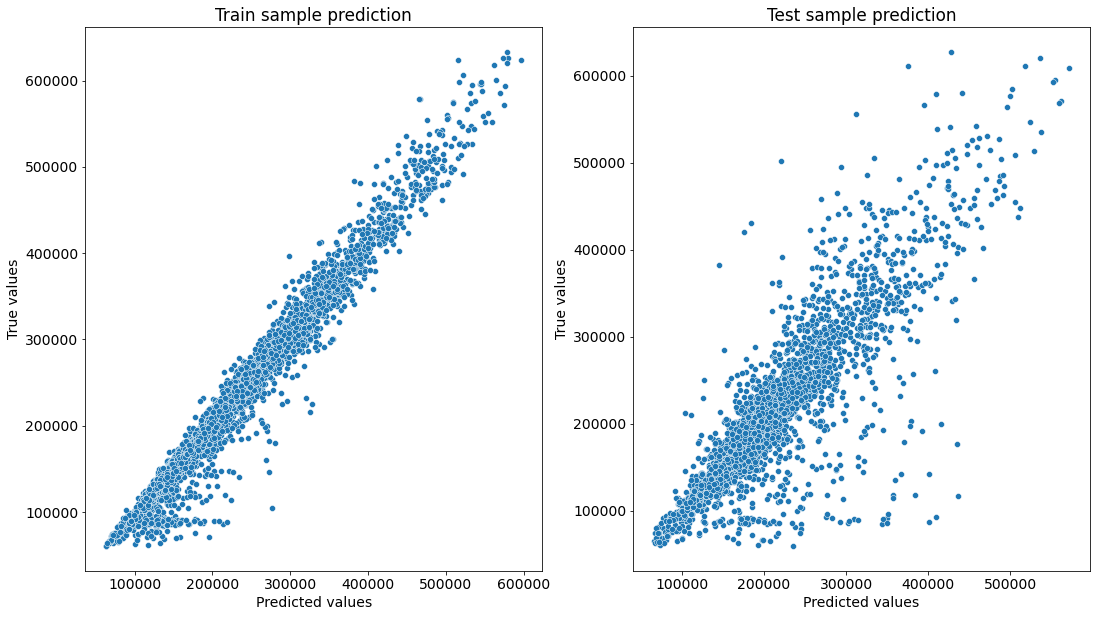

In [95]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds (y_train, y_train_preds, y_test, y_test_preds)

In [96]:
cv_score = cross_val_score(rf_model, X, y, scoring = 'r2', cv = KFold(n_splits=3, shuffle = True, random_state = 21))
cv_score

array([0.73946094, 0.75125799, 0.76131161])

In [97]:
cv_score.mean()

0.750676845352666

### Важность признаков

In [98]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),
                                  columns=['feature_name', 'importance'])

feature_importances.sort_values(by = 'importance', ascending = False)

,feature_name,importance
18,MedPriceByDistrict,0.629142
1,Square,0.121903
2,LifeSquare,0.032286
6,HouseYear,0.031445
10,Social_3,0.028410
3,KitchenSquare,0.024445
5,HouseFloor,0.023366
4,Floor,0.020097
9,Social_2,0.016268
8,Social_1,0.015938


## Тестовая выборка

In [99]:
forecast = rf_model.predict(prep_test_df)

In [100]:
my_forecast = pd.DataFrame({'Id': test_df['Id'], 'Price': forecast.flatten()}, columns = ['Id', 'Price'])

In [101]:
my_forecast.head(10)

,Id,Price
0,725,164289.809565
1,15856,236739.836281
2,5480,236381.167805
3,15664,298179.432655
4,14275,149897.131447
5,7633,213439.377530
6,13329,169699.050511
7,5502,230334.879385
8,4220,302629.380673
9,11538,211893.423728


In [102]:
my_forecast.shape

(5000, 2)

In [103]:
my_forecast.to_csv(Pozdnyakova_predictions, sep = ',', index = False, encoding = 'utf-8')